#**Data preprocessing steps**

> watch it as video https://www.youtube.com/watch?v=GP-2634exqA&t=4s






steps involved:


0. Before all these, change names of columns and values as per your understanding

1. sanity check:

  check for all these to get an idea to what steps we need to perform for this data

  * info
  * isnull
  * null %
  * duplicates
  * describe
  * head

2. exploitory Analysis:

  * Histogram for Target
  * Scatterplot for relations

3. Missing values treatment and Duplicate removal

 * imputation techiniques to fill null values
    * KNN imputer
    * median or mode

4. Outlier treatment

 * Boxplots for outlier detection
 * Remove the  founded outliers by IQR method

5. Removal of highly corelated columns
  * Heatmap for corelation(do if its num data else do it after dummies)
  * remove highly(>85%) corelated columns (they act as duplicates)

6. scaling or Normlizing data
    * describe the data before and after to see its done
    * use minmax scalling

7. Encoding data
    * using dummies to convert categorical to numeric data(drop_first)
8. Split data

9. train model

10. check accuracy of model


# Import neccessary library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  #just for exaple
from sklearn.ensemble import RandomForestRegressor   #just for exaple ,we can import desired algorithims

# Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ML/Thyroid Disease Data.csv")

In [ ]:
data.head()#data.head(x),x=no of rows
#data.tail() same as head but ending data

,created_at,entry_id,field1,field4,field5,field6,field7,field8
0,2024-05-05 14:16:56 UTC,730359,NaN,NaN,125.9,44.25,2.84,20.2
1,2024-05-05 14:17:02 UTC,730360,NaN,NaN,128.9,45.08,2.86,20.2
2,2024-05-05 14:17:07 UTC,730361,NaN,NaN,129.7,45.01,2.88,20.2
3,2024-05-05 14:17:12 UTC,730362,NaN,NaN,282.9,44.54,6.35,20.2
4,2024-05-05 14:17:17 UTC,730363,NaN,NaN,129.4,44.42,2.91,20.2


In [ ]:
data.columns

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [ ]:
#to chage column names
data=data.rename(columns={"Pclass":"passenger_class","Ticket":"Ticket_id","Embarked":"Boarding_station"})

# sanity check of data

In [ ]:
#shape
data.shape  # show total rows and columns

(169, 4)

In [ ]:
#info
data.info() #shows info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [ ]:
#find missing / null values
data.isnull().sum()

created_at      0
entry_id        0
field1        100
field4        100
field5          0
field6          0
field7          0
field8          0
dtype: int64

In [ ]:
# % of missing data
data.isnull().sum()/data.shape[0]*100

created_at      0.0
entry_id        0.0
field1        100.0
field4        100.0
field5          0.0
field6          0.0
field7          0.0
field8          0.0
dtype: float64

In [ ]:
#find duplicates
data.duplicated().sum()

19

In [ ]:
#removing duplicates
data = data.drop_duplicates()

In [ ]:
#find garbeg values
#garbage values are only be in object datatype,so
for i in data.select_dtypes(include="object").columns:  #data.select_dtypes()
  print(data.value_counts())                            #data.value_counts() gives unique items in a column
  print("**"*60)


# Exploratory Data Analysis

In [ ]:
# describing statistics
data.describe()
#give mean,median,mode,std etc

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [ ]:
data.describe(include="object")
# gives descriptive stats of object dtypes

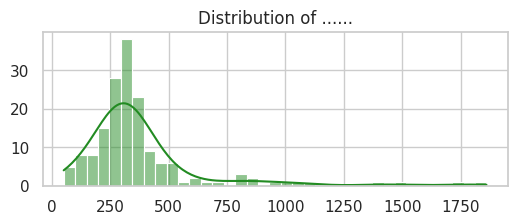

In [ ]:
# histogram to see standarddeveation

# for a single feature
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2))
sns.histplot(data["Calories"], color='forestgreen', kde=True) # for example "Calories" here
plt.title('Distribution of ......')
plt.xlabel('')
plt.ylabel('')
plt.show()
# for all features

# for i in data.columns:
#   sns.histplot(data[i],color="forestgreen",kde=True)
#   plt.show()
#   print()

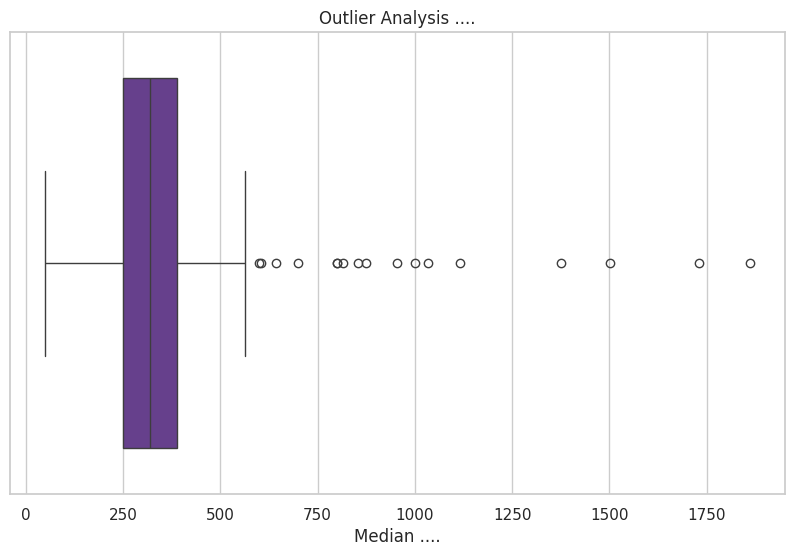

In [ ]:
#find outliers using boxplot
#it is recomended to handle outliers in all features

# for a single feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Calories'], color='rebeccapurple')
plt.title('Outlier Analysis ....')
plt.xlabel('Median ....')
plt.show()
# for all features

# for i in data.select_dtypes(include="number").columns:
#   sns.boxplot(x=data)
#   plt.show()

In [ ]:
#scatter plot to find relationships
data.select_dtypes(include="number").columns

Index(['SNo', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

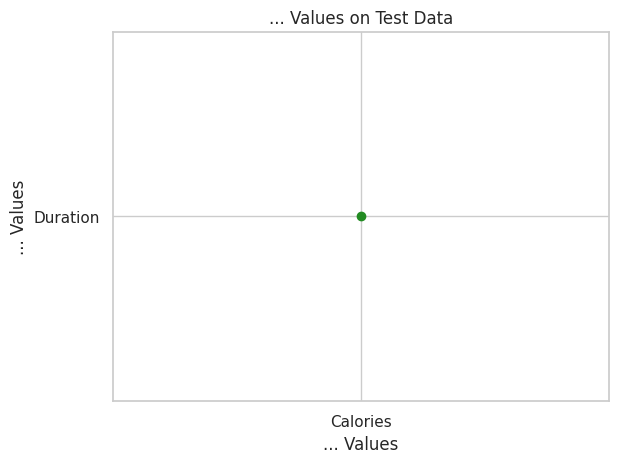

In [ ]:
#scatter plot to find relationships
#for single feature
plt.scatter('Calories', 'Duration', color = "forestgreen")
plt.xlabel('... Values')
plt.ylabel('... Values')
plt.title('... Values on Test Data')
plt.show()
# for all features
#for i in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:   selects all columns you want to represent
#   sns.scatterplot(data=data,x=i,y='Calories')
#   plt.show()

In [ ]:
#finding correlation and heatmap
numericalDatadata=data.select_dtypes(include="number")  #only accepts numbers
numericalDatadata.corr()
#it gives corr matrix

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


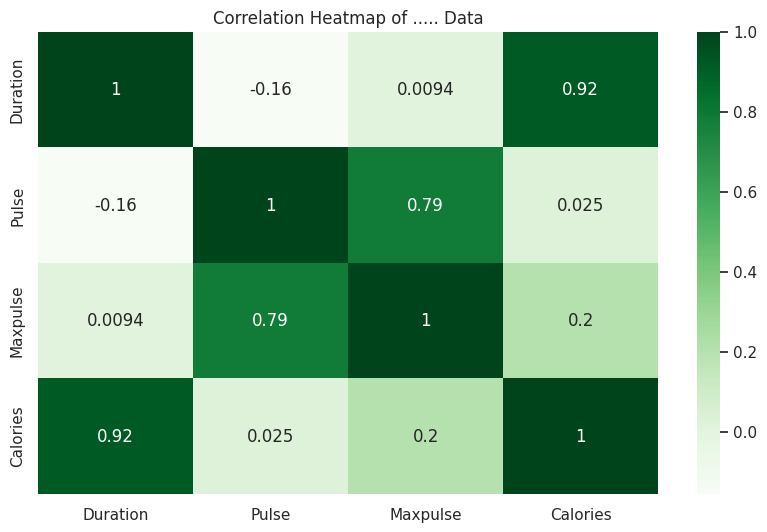

In [ ]:
# corelation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numericalDatadata.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of ..... Data')
plt.show()

#  Missing values treatment and Duplicate removal


> This method is also known as IMPUTATION                .
Refer to know different methods to handle missing data :
https://www.youtube.com/watch?v=uDr67HBIPz8&t=10s




> Duplicates removal



In [ ]:
#dropping duplicates
dataCleaned=outliersRemovedData.drop_duplicates()
dataCleaned

In [ ]:
cleaanedData=dataCleaned # this data we ge by removing null,outliers,duplicates which is clean



> Missing values treatment



In [ ]:
#choose the method of imputing missing value
#like mean, median, mode or KNNiputer
#check missing data                           /Dont treat missing values in target variable/
data.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [ ]:
#using median
# for i in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    #data[i].fillna(data[i].median,inplace=True])
#(inplace=True) means that the changes are made directly on the original data without creating a new object

# using KNNImputer
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [ ]:
#using KNNImputer
for i in data.select_dtypes(include="number").columns:
  data[i]=impute.fit_transform(data[[i]])
  #it uses the the average of nearest data


# Outliers treatments

In [ ]:
#treating outliers(check using Boxplot)
#By IQR(inter quantile range) method

# Calculate Q1(25% at data) and Q3(75% at data)
Q1 = data['Calories'].quantile(0.25)
Q3 = data['Calories'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers -> remove data which is less than 25 and greater than 75 %
outliersRemovedData = data[(data['Calories'] >= lower_bound) & (data['Calories'] <= upper_bound)]


#   fun to detect outliers
    def outlier_detector(column,data):

    Q1=data[column].quantile(0.25)
    Q2=data[column].quantile(0.75)
    IQR=Q2-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q2+1.5*IQR
    data_without_outliers=data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
    #print(data_without_outliers.shape)
    return data_without_outliers

    #fun call->
    for i in data.columns:
    data_without_outliers=outlier_detector(i,data)
    print(i,data_without_outliers.shape)

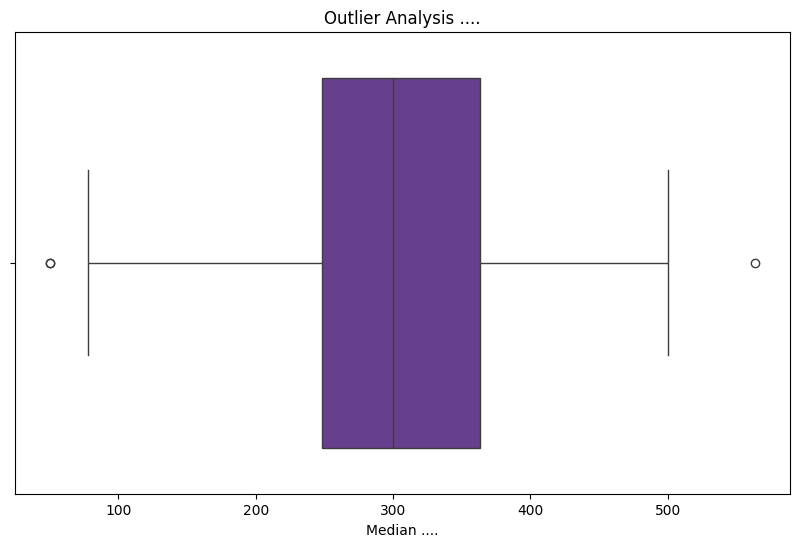

In [ ]:
#again check boxplot for outliers
# for a single feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=outliersRemovedData['Calories'], color='rebeccapurple')
plt.title('Outlier Analysis ....')
plt.xlabel('Median ....')
plt.show()

to just get them with  function

    def  outlier_detector(column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(.75)
    IQR=Q3-Q1
    lowerbound=Q1-IQR*1.5   
    upperbound=Q3+IQR*1.5
    return lowerbound,upperbound

call the function with a column
outlier_detector(data["Calories"])

removing outliers using function

    for i in ["column 1","column 2","like it ,all required cilumns"]:
    lower_bound,upper_bound=outlier_detector(data[i])
    data[i]=np.where (data[i] < lower_bound,lower_bound,data[i]]) -> if data[i] < lower_bound then fill it with lower_bound else keep it as data[i]
    data[i]=np.where (data[i] > upper_bound,upper_bound,data[i]]) -> same as above

check again the boxplot for outliers

    for i in ["column 1","column 2","like it ,all required cilumns"]:
    sns.boxplot(data[i])
    plt.show()

# Dta scaling or normalization

In [ ]:
# we use scaling
#scaling of data
from sklearn.preprocessing import MinMaxScaler

scaleMinMax = MinMaxScaler()

scaleMinMax.fit(target)
target = scaleMinMax.transform(target)

scaleMinMax.fit(independentData)
independentData = scaleMinMax.transform(independentData)

#use data.describe ,before and after scaling to see difference


#Encoding of data

> Encoding -> Converting data from object(text or non numeric) to numeric





In [ ]:
DummyData=pd.get_dummies(data=cleaanedData,columns=["calories"],drop_first=True)# select object dtype columns ,including target(if it is object)
DummyData
#but here we dont have object dtype ,so its just for example

#how dummies work

# they work by removing the first corelated column
# example,
# we have a categorical variable "Color" with three categories: red, green, and blue. We want to create dummy variables to represent this data numerically.
#We start by creating a binary variable for each category:

    #"red" variable: 1 if the color is red, 0 otherwise.
    #"green" variable: 1 if the color is green, 0 otherwise.
    #"blue" variable: 1 if the color is blue, 0 otherwise.
# However, this creates a problem called multicollinearity, which is when two or more variables are highly correlated.
# In this case, the sum of our dummy variables always equals 1, making them perfectly correlated.
#    To solve this problem, we drop one of the dummy variables - usually the first one, in this case, "red".

#Now, our data only has dummy variables for "green" and "blue", and the data looks like this:

#   Color  Green  Blue
#0    red      0     0
#1  green      1     0
#2   blue      0     1

In [ ]:
#now combine dummies and cleaneddata
cleanedData = cleanedData.drop(columns='calories')  # Drop the original categorical column // here drop the columns which used to create dummies
Final_data = pd.concat([cleanedData, DummyData], axis=1)  # Concatenate the DataFrames

# Now Split data to Train_Test


# Fit the data to model

> Training means giving data to fit method
>Then predic :0



# Accuracy check for Models

In [ ]:
#Regression

#from sklearn.metrics import accuracy_score

# # Calculate MSE

# #mse = mean_squared_error(y_test, pred_Model_RFReg)
# print('MSE:', mse)

# # Calculate RMSE

# rmse = np.sqrt(mse)
# print('RMSE:', rmse)

#To evaluate the accuracy of a regression model, you can use several evaluation metrics. Some of the most common metrics for regression models are:

  #  Mean Squared Error (MSE): MSE measures the average squared difference between the actual and predicted values.
  # A lower MSE indicates better model performance. You can calculate MSE using the mean_squared_error() function from sklearn.metrics.

  #  Root Mean Squared Error (RMSE): RMSE is the square root of MSE, which brings the metric back to the original scale of the data.
  # Similar to MSE, a lower RMSE indicates better model performance. You can calculate RMSE using the mean_squared_error() function from sklearn.metrics and then take the square root.

In [ ]:
#Classification

#from sklearn.metrics import f1_score

#f1 = f1_score(y_test, pred_Model_RFReg,average='micro')
#print("F1-Score:", f1)

#'micro': This method calculates the F1-Score globally by counting the total true positives, false positives,
# and false negatives across all labels. It's useful when you want a single score that represents the overall performance of your classifier across all labels.

In [ ]:
#classification

# from sklearn.metrics import accuracy_score, classification_report

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


In [ ]:
#Diff bet accuracy and f1 score

#F1 score

# It's a measure of a model's performance that considers both false positives and false negatives.
# F1-Score is more appropriate when there's an uneven distribution of classes (class imbalance)
#since it takes into account both false positives and false negatives.

#Accuracy

# Accuracy measures the proportion of correctly predicted instances (true positives and true negatives) out of all instances.
# It's more appropriate when there's an even distribution of classes.
# Accuracy is not a good metric to evaluate models on imbalanced datasets,
# as it doesn't account for the distribution of classes and might lead to overly optimistic results.

# Plots